In [1]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Convert to pandas DataFrame for easier handling
import pandas as pd

# Create a DataFrame with the data and the target
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Display the first few rows of the dataset
print(data.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [2]:
# Display information about the dataset
print(data.info())

# Check the distribution of the target variable
print(data['target'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None
target
0    50
1    50
2    50
Name: count, dtype: int64


In [3]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # The last column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



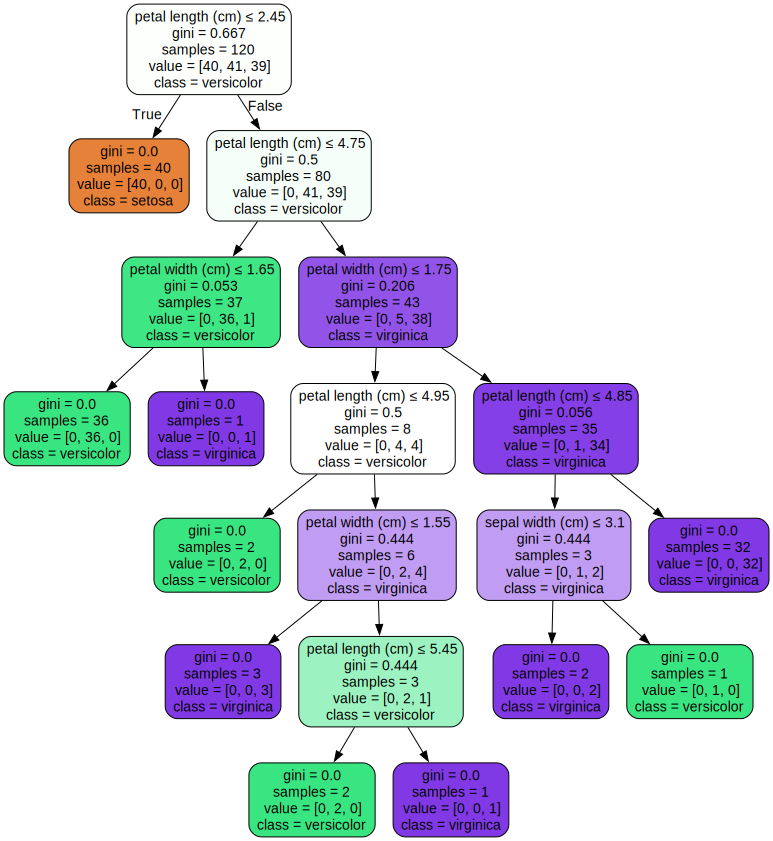

In [10]:
from sklearn.tree import export_graphviz
import graphviz

# Export the tree as a dot file
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=iris.feature_names,  
                           class_names=iris.target_names,  
                           filled=True, rounded=True,  
                           special_characters=True)  

# Draw the tree
graph = graphviz.Source(dot_data)  
graph


In [9]:
# Assuming `new_data` is the new data we want to make predictions on
new_data = [[5.1, 3.5, 1.4, 0.2],  # Example sample 1
            [6.2, 2.9, 4.3, 1.3],  # Example sample 2
            [7.3, 2.9, 6.3, 1.8]]  # Example sample 3

# Provide feature names along with the new data
new_data_with_names = pd.DataFrame(data=new_data, columns=iris.feature_names)

# Use the trained classifier to make predictions
predicted_classes = clf.predict(new_data_with_names)

# Print the predicted classes
print("Predicted Classes:", predicted_classes)


Predicted Classes: [0 1 2]
